<a href="https://colab.research.google.com/github/beverast/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# IMPORTS
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', 
                  header=None, names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7','A8', 'A9', 'A10', 
                                      'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
# Dataset size description: 690 instances and 15 attributes
df.shape

(690, 16)

In [0]:
# No null values? This dataset probably uses question marks or something similar to represent missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     690 non-null object
A2     690 non-null object
A3     690 non-null float64
A4     690 non-null object
A5     690 non-null object
A6     690 non-null object
A7     690 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    690 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [0]:
# Yes, question marks it is. I need to replace these with np.NaN.
df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [0]:
# Check to make sure there aren't ALSO np.NaN values present
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
# df.isna().sum() should now show 12 np.NaNs for df[0]
df = df.replace({'?': np.NaN})
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
# Now I need to perform type-casting on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null object
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [0]:
df['A1'].value_counts()

b    468
a    210
Name: A1, dtype: int64

In [0]:
df['A1'] = df['A1'].astype('category')
df['A1'].values

[b, a, a, b, b, ..., b, a, a, b, b]
Length: 690
Categories (2, object): [a, b]

In [0]:
# NaN values are preserved
df['A1'].isna().sum()

12

In [0]:
# A2 and A3 are continuous
df['A2'].describe()

count       678
unique      349
top       22.67
freq          9
Name: A2, dtype: object

In [0]:
# Cast type then check for NaN values
df['A2'] = df['A2'].astype(float)
df['A2'].dtype, df['A2'].isna().sum()

(dtype('float64'), 12)

In [0]:
df['A3'] = df['A3'].astype(float)
df['A3'].dtype, df['A3'].isna().sum()

(dtype('float64'), 0)

In [0]:
# A4 and A5 can be cast to category types
df['A4'].isna().sum(), df['A4'].describe()

(6, count     684
 unique      3
 top         u
 freq      519
 Name: A4, dtype: object)

In [0]:
df['A5'].isna().sum(), df['A5'].describe()

(6, count     684
 unique      3
 top         g
 freq      519
 Name: A5, dtype: object)

In [0]:
df['A4'] = df['A4'].astype('category')
df['A5'] = df['A5'].astype('category')
df['A4'].dtype, df['A5'].dtype, df['A4'].isna().sum(), df['A5'].isna().sum()

(CategoricalDtype(categories=['l', 'u', 'y'], ordered=False),
 CategoricalDtype(categories=['g', 'gg', 'p'], ordered=False),
 6,
 6)

In [0]:
# A6 and A7 could be cast to categories or to strings
df['A6'].isna().sum(), df['A6'].describe()

(9, count     681
 unique     14
 top         c
 freq      137
 Name: A6, dtype: object)

In [0]:
df['A7'].isna().sum(), df['A7'].describe()

(9, count     681
 unique      9
 top         v
 freq      399
 Name: A7, dtype: object)

In [0]:
df['A6'] = df['A6'].astype('category')
df['A7'] = df['A7'].astype('category')
df['A6'].dtype, df['A7'].dtype, df['A6'].isna().sum(), df['A7'].isna().sum()

(CategoricalDtype(categories=['aa', 'c', 'cc', 'd', 'e', 'ff', 'i', 'j', 'k', 'm', 'q',
                   'r', 'w', 'x'],
                  ordered=False),
 CategoricalDtype(categories=['bb', 'dd', 'ff', 'h', 'j', 'n', 'o', 'v', 'z'], ordered=False),
 9,
 9)

In [0]:
# A8, A11, A14, and A15 are all continuous, so I'll cast them to a numeral type if necessary
df['A8'].dtype, df['A11'].dtype, df['A14'].dtype, df['A15'].dtype

(dtype('float64'), dtype('int64'), dtype('O'), dtype('int64'))

In [0]:
# So only A14 is an object type, and also has NaNs
df['A8'].isna().sum(), df['A11'].isna().sum(), df['A14'].isna().sum(), df['A15'].isna().sum()

(0, 0, 13, 0)

In [0]:
df['A14'].describe()

count       677
unique      170
top       00000
freq        132
Name: A14, dtype: object

In [0]:
df['A14'] = df['A14'].astype(float)
df['A14'].isna().sum()

13

In [0]:
# A9, A10, A12, and A13 can be converted to categorical type
df['A9'].dtype, df['A10'].dtype, df['A12'].dtype, df['A13'].dtype

(dtype('O'), dtype('O'), dtype('O'), dtype('O'))

In [0]:
df['A9'].isna().sum(), df['A10'].isna().sum(), df['A12'].isna().sum(), df['A13'].isna().sum()

(0, 0, 0, 0)

In [0]:
df['A9'] = df['A9'].astype('category')
df['A10'] = df['A10'].astype('category')
df['A12'] = df['A12'].astype('category')
df['A13'] = df['A13'].astype('category')

df['A9'].dtype, df['A10'].dtype, df['A12'].dtype, df['A13'].dtype

(CategoricalDtype(categories=['f', 't'], ordered=False),
 CategoricalDtype(categories=['f', 't'], ordered=False),
 CategoricalDtype(categories=['f', 't'], ordered=False),
 CategoricalDtype(categories=['g', 'p', 's'], ordered=False))

In [0]:
# Last category to type cast
df['A16'].dtype, df['A16'].isna().sum()

(dtype('O'), 0)

In [0]:
df['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [0]:
df['A16'] = df['A16'].astype('category')

In [0]:
df['A16'].dtype

CategoricalDtype(categories=['+', '-'], ordered=False)

In [0]:
# Verify that the dataframe has the correct types one last time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null category
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null category
A5     684 non-null category
A6     681 non-null category
A7     681 non-null category
A8     690 non-null float64
A9     690 non-null category
A10    690 non-null category
A11    690 non-null int64
A12    690 non-null category
A13    690 non-null category
A14    677 non-null float64
A15    690 non-null int64
A16    690 non-null category
dtypes: category(10), float64(4), int64(2)
memory usage: 41.1 KB


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# Groupby class labels (+/-) and calculate the mean of the continous features
# There are big difference in the means of A8, A11, and A15
df.groupby(by=df['A16']).mean()

,A2,A3,A8,A11,A14,A15
A16,,,,,,
+,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
-,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744


In [0]:
# Check the variances to determine which T-test to use
df.groupby(by=['A16']).var()

,A2,A3,A8,A11,A14,A15
A16,,,,,,
+,164.086896,29.937148,16.980928,39.945456,26169.751384,5.867198e+07
-,119.230917,18.815311,4.496438,3.610187,32965.789440,4.510584e+05


D:\Miniconda\envs\JupyterLab\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Miniconda\envs\JupyterLab\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


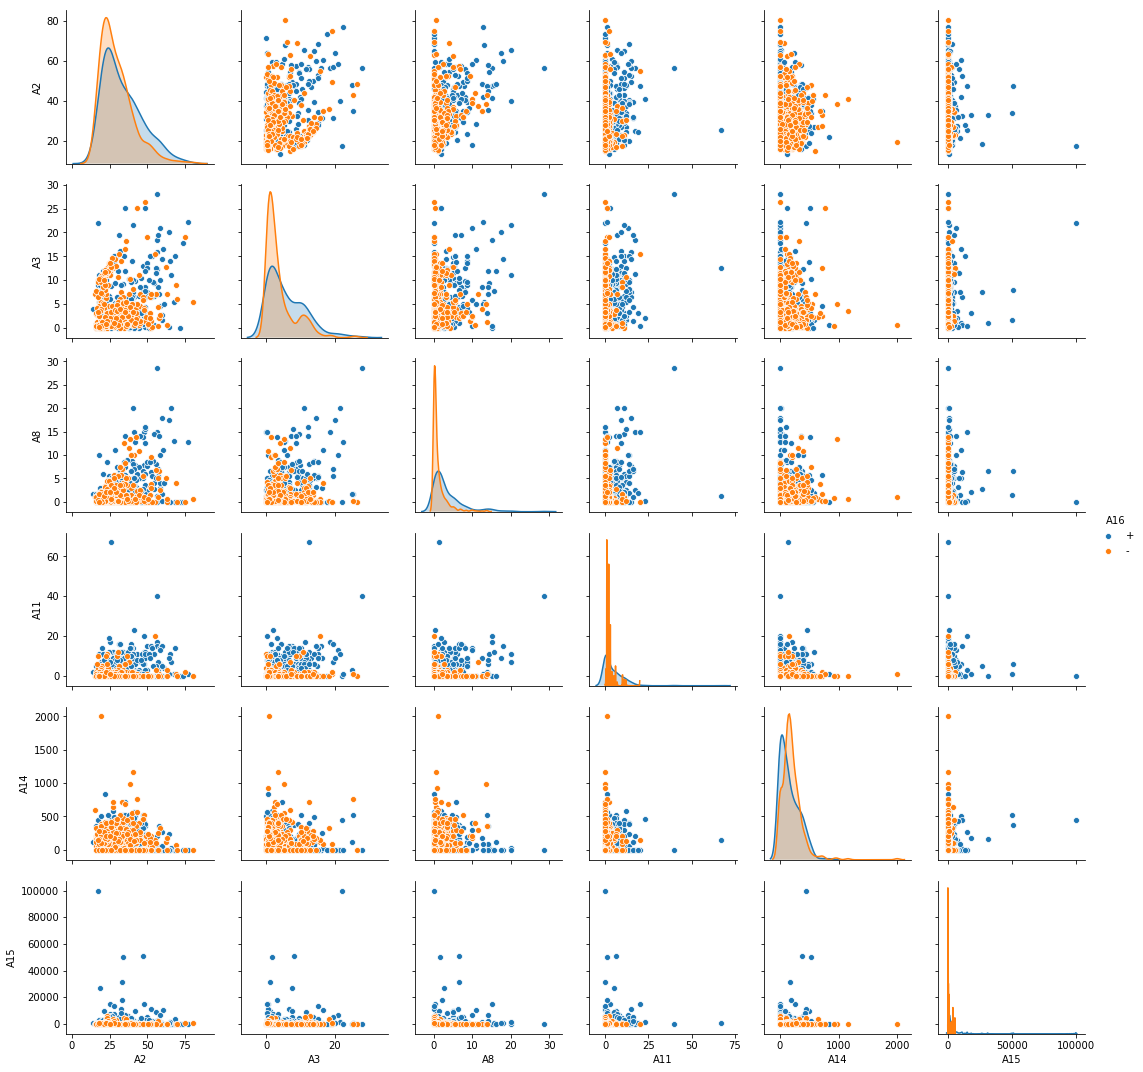

In [0]:
# Explore relationships between continous features in the dataframe
# Visualization of features colored by class label (+/-) groupings
sns.pairplot(df, hue='A16');

In [0]:
# Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes,
# and another feature that is notably less different (though perhaps still "statistically significantly" different).


# I am calculating a 2-sample T-test because I am going to compare the means of two classes per feature. 
# The first test will be ran on feature A11 because the means of the two are extremely different. 
# Thus: H0 = Ax(positive) and Ax(negative) will have equal means
#       H1 = Ax(positive) will have a greater mean compared to Ax(negative)

# Above I determined that the variances are not equal for A11
t_stat, p_val = stats.ttest_ind(df.loc[df['A16'] == '+', ['A11']], 
                df.loc[df['A16'] == '-', ['A11']], 
                nan_policy='omit', equal_var=False)
print('Feature: A11')
print('T-test statistic: ', t_stat[0])
print('T-test p-value:    ', p_val[0])

Feature: A11
T-test statistic:  10.6384190682749
T-test p-value:     4.310254123415665e-23


In [0]:
# Above I determined that the variances are not equal for A2
t_stat, p_val = stats.ttest_ind(df.loc[df['A16'] == '+', ['A2']], 
                df.loc[df['A16'] == '-', ['A2']], 
                nan_policy='omit', equal_var=False)
print('Feature: A2')
print('T-test statistic: ', t_stat[0])
print('T-test p-value:   ', p_val)

Feature: A2
T-test statistic:  4.224490929851236
T-test p-value:    2.7673850124552034e-05


A1     a    b  All
A16               
+     98  206  304
-    112  262  374
All  210  468  678


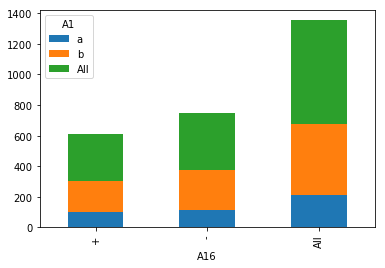

In [0]:
# Explore relationships between categorical features and their their class label (+/-)
print(pd.crosstab(df['A16'], df['A1'], margins=True))
pd.crosstab(df['A16'], df['A1'], margins=True).plot(kind='bar', stacked=True);

A4   l    u    y  All
A16                  
+    2  256   45  303
-    0  263  118  381
All  2  519  163  684


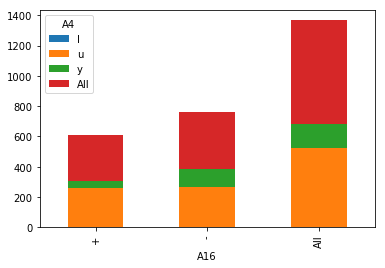

In [0]:
print(pd.crosstab(df['A16'], df['A4'], margins=True))
pd.crosstab(df['A16'], df['A4'], margins=True).plot(kind='bar', stacked=True);

A5     g  gg    p  All
A16                   
+    256   2   45  303
-    263   0  118  381
All  519   2  163  684


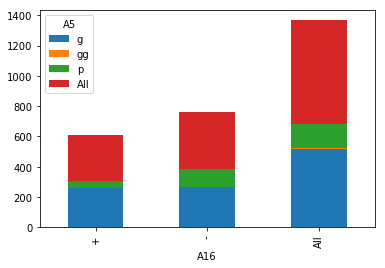

In [0]:
print(pd.crosstab(df['A16'], df['A5'], margins=True))
pd.crosstab(df['A16'], df['A5'], margins=True).plot(kind='bar', stacked=True);

A6   aa    c  cc   d   e  ff   i   j   k   m   q  r   w   x  All
A16                                                             
+    19   62  29   7  14   7  14   3  14  16  51  2  33  32  303
-    35   75  12  23  11  46  45   7  37  22  27  1  31   6  378
All  54  137  41  30  25  53  59  10  51  38  78  3  64  38  681


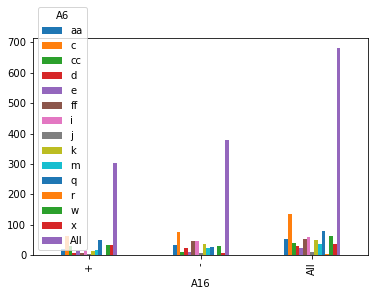

In [0]:
print(pd.crosstab(df['A16'], df['A6'], margins=True))
pd.crosstab(df['A16'], df['A6'], margins=True).plot(kind='bar', stacked=False);

A7   bb  dd  ff    h  j  n  o    v  z  All
A16                                       
+    25   2   8   87  3  2  1  169  6  303
-    34   4  49   51  5  2  1  230  2  378
All  59   6  57  138  8  4  2  399  8  681


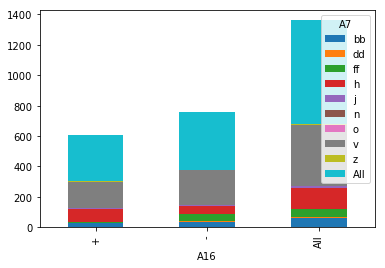

In [0]:
print(pd.crosstab(df['A16'], df['A7'], margins=True))
pd.crosstab(df['A16'], df['A7'], margins=True).plot(kind='bar', stacked=True);

A9     f    t  All
A16               
+     23  284  307
-    306   77  383
All  329  361  690


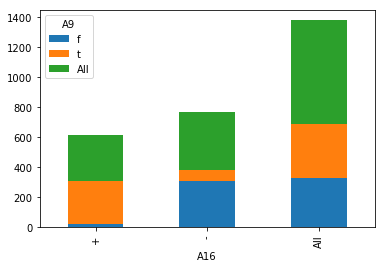

In [0]:
# Very interesting relationship between A16 and A9
print(pd.crosstab(df['A16'], df['A9'], margins=True))
pd.crosstab(df['A16'], df['A9'], margins=True).plot(kind='bar', stacked=True);

A10    f    t  All
A16               
+     98  209  307
-    297   86  383
All  395  295  690


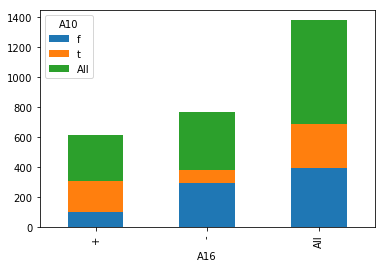

In [0]:
# Another interesting relationship
print(pd.crosstab(df['A16'], df['A10'], margins=True))
pd.crosstab(df['A16'], df['A10'], margins=True).plot(kind='bar', stacked=True);

A12    f    t  All
A16               
+    161  146  307
-    213  170  383
All  374  316  690


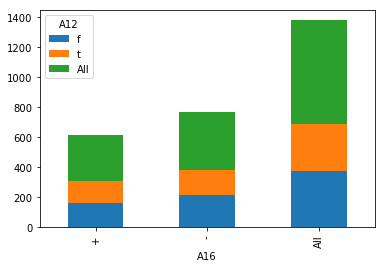

In [0]:
print(pd.crosstab(df['A16'], df['A12'], margins=True))
pd.crosstab(df['A16'], df['A12'], margins=True).plot(kind='bar', stacked=True);

A13    g  p   s  All
A16                 
+    287  5  15  307
-    338  3  42  383
All  625  8  57  690


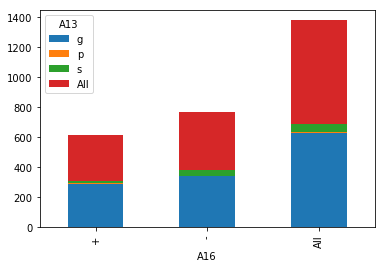

In [0]:
print(pd.crosstab(df['A16'], df['A13'], margins=True))
pd.crosstab(df['A16'], df['A13'], margins=True).plot(kind='bar', stacked=True);

In [0]:
# For the categorical features, explore by creating "cross tabs" / contingency tables between them and the class label, and apply the Chi-squared test to them.
# There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

# Extreme values: A9
# Less extreme: A13
contingency =pd.crosstab(df['A16'], df['A9'])
contingency = contingency.values
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency)

print('Feature: A9')
print('Chi-Squared: ', chi_squared)
print('P-value: ', p_value)
print('Degrees of Freedom: ', dof)

Feature: A9
Chi-Squared:  355.2038167412799
P-value:  3.1185900878457007e-79
Degrees of Freedom:  1


In [0]:
contingency =pd.crosstab(df['A16'], df['A13'])
contingency = contingency.values
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency)

print('Feature: A13')
print('Chi-Squared: ', chi_squared)
print('P-value: ', p_value)
print('Degrees of Freedom: ', dof)

Feature: A13
Chi-Squared:  9.191570451545383
P-value:  0.010094291370456362
Degrees of Freedom:  2


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [0]:
# Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?

Feature: A11

T-test statistic:  10.6384190682749

T-test p-value:     4.310254123415665e-23

For A11 the mean values were quite different and the p-value is very low. This means that I must REJECT the null hypothesis that each class has for A11 has a similar mean.
The (+) class has a much higher mean value compared to the (-) class, producing a highly positive t-statistic.

------------------------------------

Feature: A2
    
T-test statistic:  4.224490929851236

T-test p-value:    2.7673850124552034e-05

For A2 the mean values are definitely closer than A11, but there is still a statistically significant difference. I will still REJECT the null hypothesis that both classes have an equal mean. The (+) class still has a higher mean than the (-) class.

In [0]:
# Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?

Feature: A9

Chi-Squared:  355.2038167412799

P-value:  3.1185900878457007e-79

Degrees of Freedom:  1

Feature A9 has an obviously extreme chi-squared score between the classes (+/-), which leads me to the conclusion that I must REJECT the null hypothesis that these are independent. This test also has a very low p-value indicating that these results are statistically significant. 

------------------------

Feature: A13

Chi-Squared:  9.191570451545383

P-value:  0.010094291370456362

Degrees of Freedom:  2

Feature A13 has a much lower chi-squared statistic compared to A9, indicating that there is less dependence. The p-value is also much higher at around 0.01, but it is still below the standard 0.05 threshold for significance. Even though there's certainly less of a dependence I must conclude that I REJECT the null hypothesis that they are independent. 